In [2]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

In [3]:
def node_1(state: State):
    return state

def node_2(state: State):
    return state

def node_3(state: State):
    return state

def aggregator(state: State):
    return state


In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("aggregator", aggregator)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", "aggregator")
builder.add_edge("node_3", "aggregator")
builder.add_edge("aggregator", END)

agent = builder.compile()

In [5]:
print(agent.get_graph().draw_ascii())

        +-----------+          
        | __start__ |          
        +-----------+          
               *               
               *               
               *               
          +--------+           
          | node_1 |           
          +--------+           
          *         *          
        **           **        
       *               *       
+--------+          +--------+ 
| node_2 |          | node_3 | 
+--------+          +--------+ 
          *         *          
           **     **           
             *   *             
        +------------+         
        | aggregator |         
        +------------+         
               *               
               *               
               *               
          +---------+          
          | __end__ |          
          +---------+          


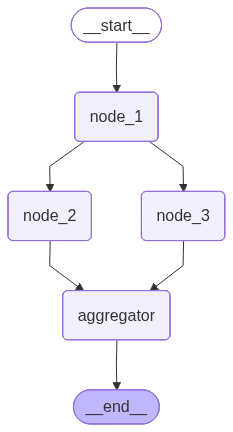

In [11]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

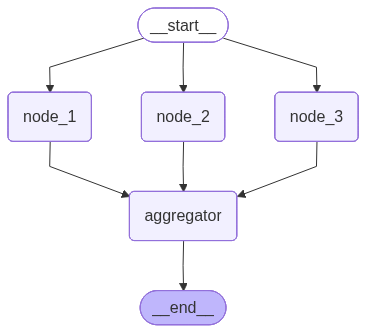

In [12]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("aggregator", aggregator)

builder.add_edge(START, "node_1")
builder.add_edge(START, "node_2")
builder.add_edge(START, "node_3")
builder.add_edge("node_1", "aggregator")
builder.add_edge("node_2", "aggregator")
builder.add_edge("node_3", "aggregator")
builder.add_edge("aggregator", END)

agent = builder.compile()
display(Image(agent.get_graph().draw_mermaid_png()))